<a href="https://colab.research.google.com/github/sanket-choudhary-12/Digit_classification_using_nlp/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [7]:
print(X_train[5].shape)

(28, 28)


2


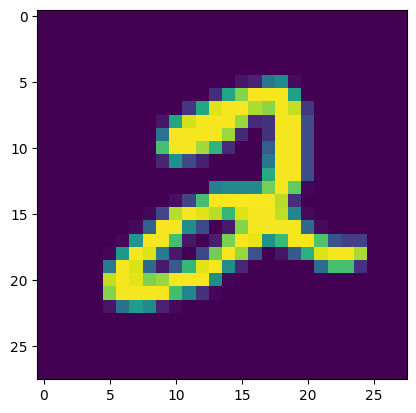

In [8]:
plt.imshow(X_train[5])
plt.show
print(y_train[5])

In [9]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3024 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1409 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.038

In [14]:
loss,accuracy=model.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9741
0.10328936576843262 0.9740999937057495


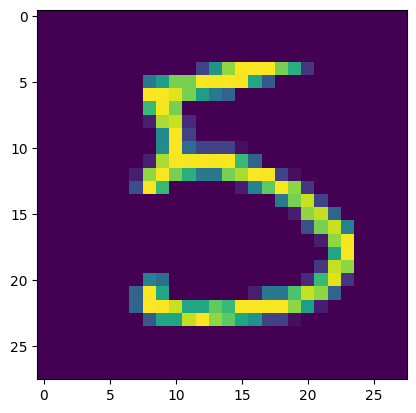

In [15]:
plt.imshow(X_test[15])
plt.show()

In [16]:
print(y_test[15])

5


In [17]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

In [19]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [20]:
print(conf_mat)

tf.Tensor(
[[ 965    0    1    1    1    2    4    2    2    2]
 [   0 1126    2    0    0    0    2    0    5    0]
 [   6    4  986    9    6    0    5    7    8    1]
 [   0    0    1  991    1    2    1    4    4    6]
 [   2    1    1    0  960    0    6    2    1    9]
 [   3    0    0   12    1  860    8    1    4    3]
 [   3    2    1    1    7    2  940    0    2    0]
 [   0   13    6    6    0    0    0  992    1   10]
 [   4    1    2    8    5    5    5    2  936    6]
 [   1    3    0    4    8    1    1    4    3  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

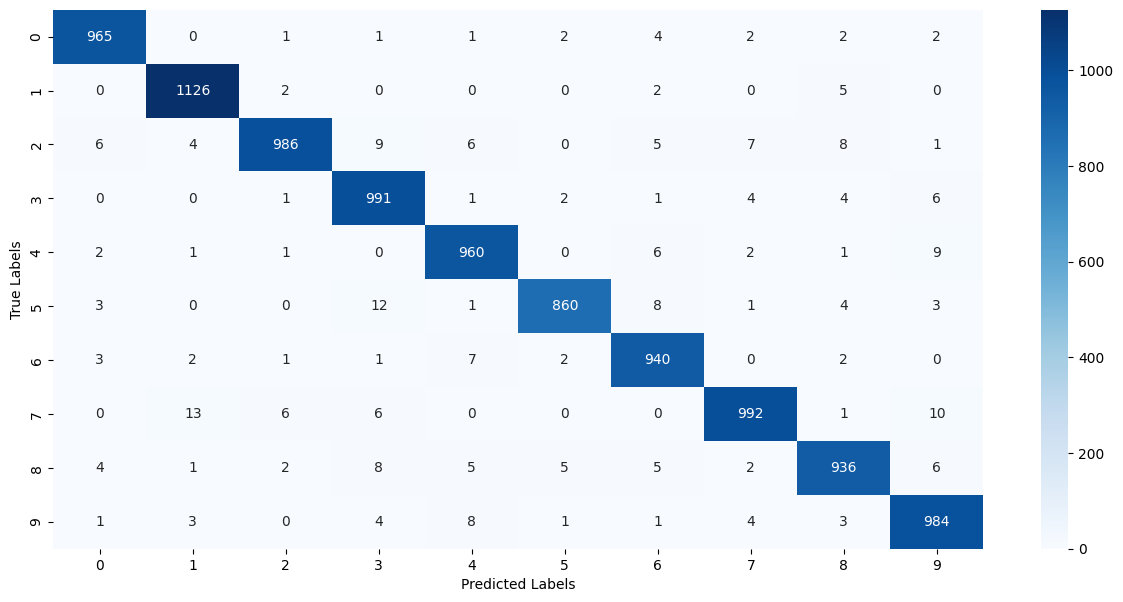

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [23]:
input_image=cv2.imread('/content/test_for_mnist.png')

In [25]:
type(input_image)

numpy.ndarray

In [26]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


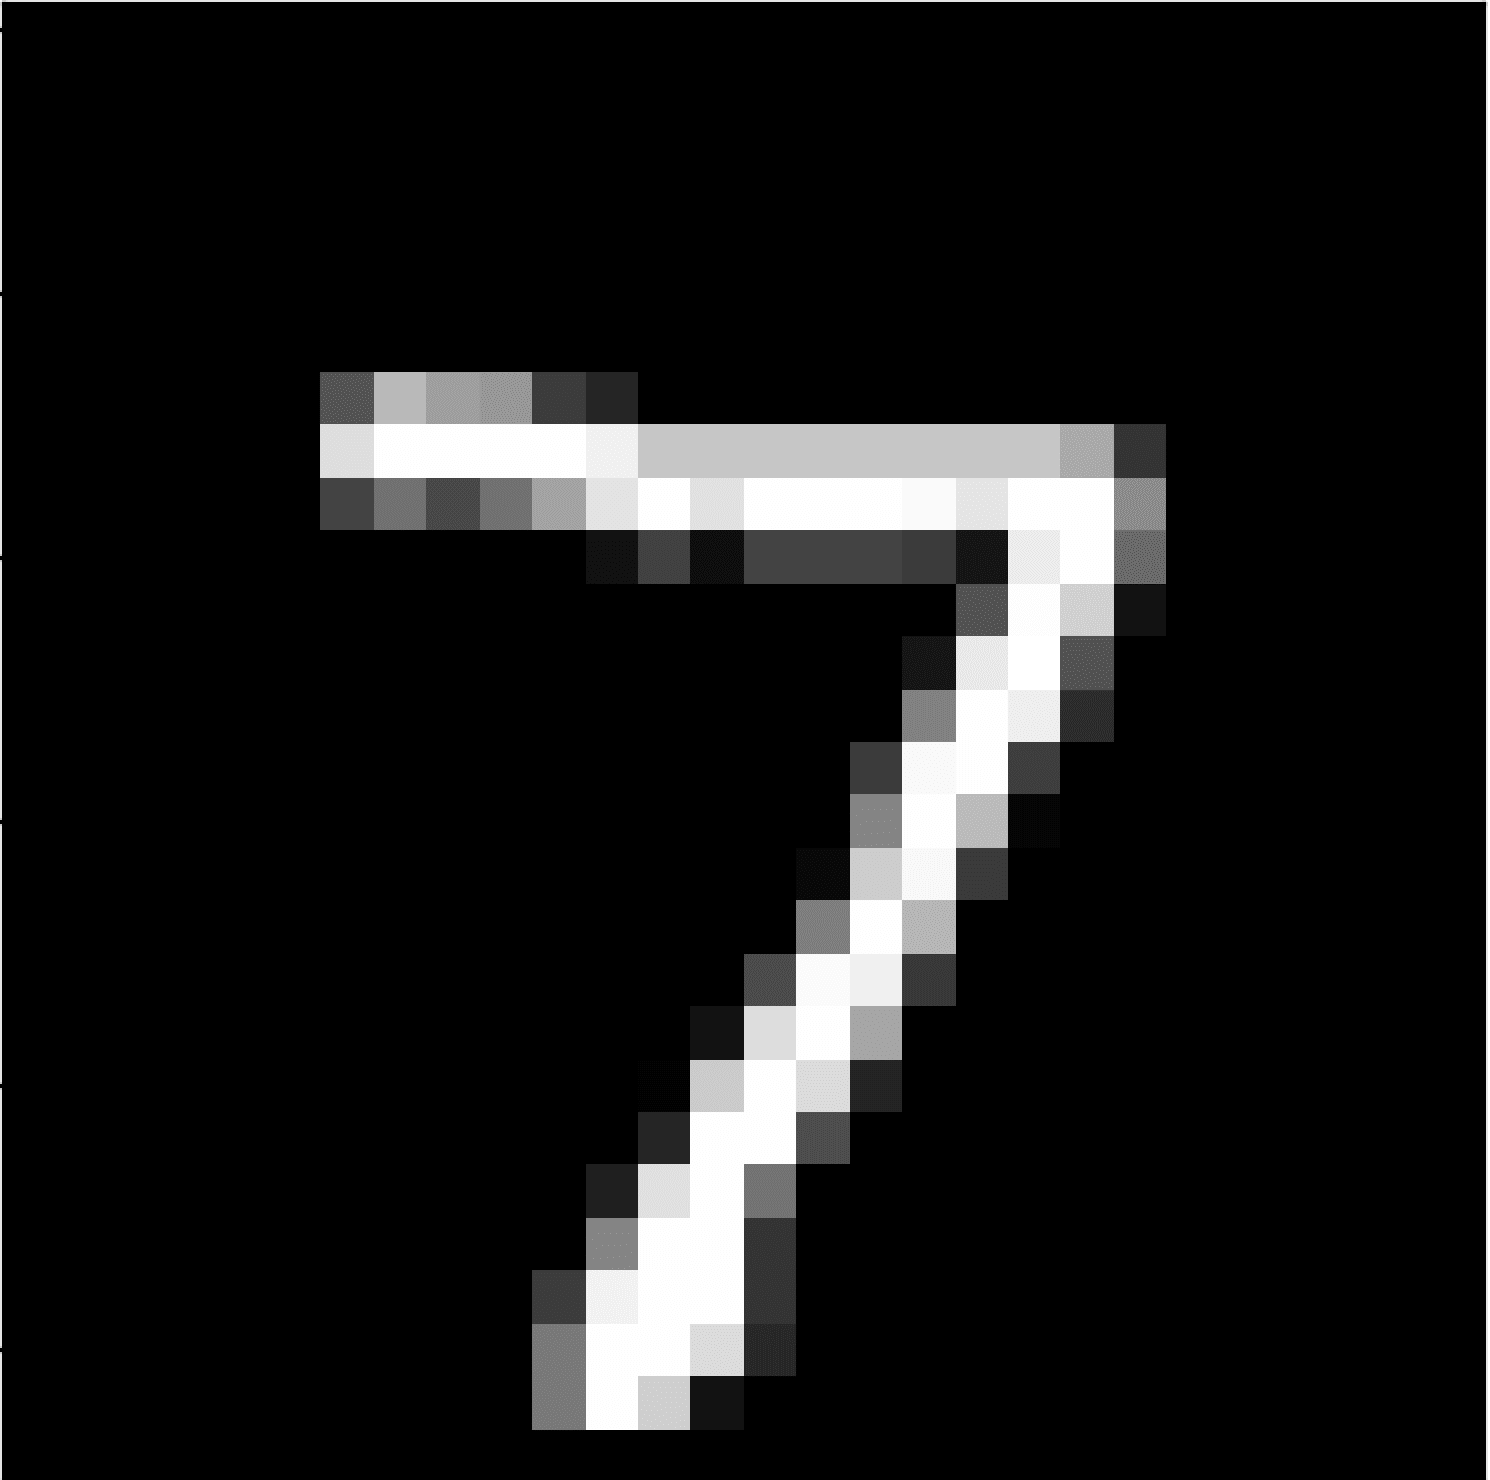

In [28]:
cv2_imshow(input_image)

In [29]:
input_image.shape

(1480, 1490, 3)

In [30]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(1480, 1490)

In [32]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [33]:
input_image_resize.shape

(28, 28)

In [34]:
cv2_imshow(input_image_resize)

In [35]:
input_image_resize = input_image_resize/255

In [36]:
type(input_image_resize)


numpy.ndarray

In [37]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[1.4524347e-02 9.7781800e-02 9.3411577e-01 9.9846232e-01 4.4860666e-08
  6.2311701e-03 2.5306661e-14 9.9999976e-01 1.5618836e-02 9.8815149e-01]]


In [39]:
input_pred_label = np.argmax(input_prediction)

In [40]:
print(input_pred_label)

7


Path of the image to be predicted: /content/test_for_mnist.png


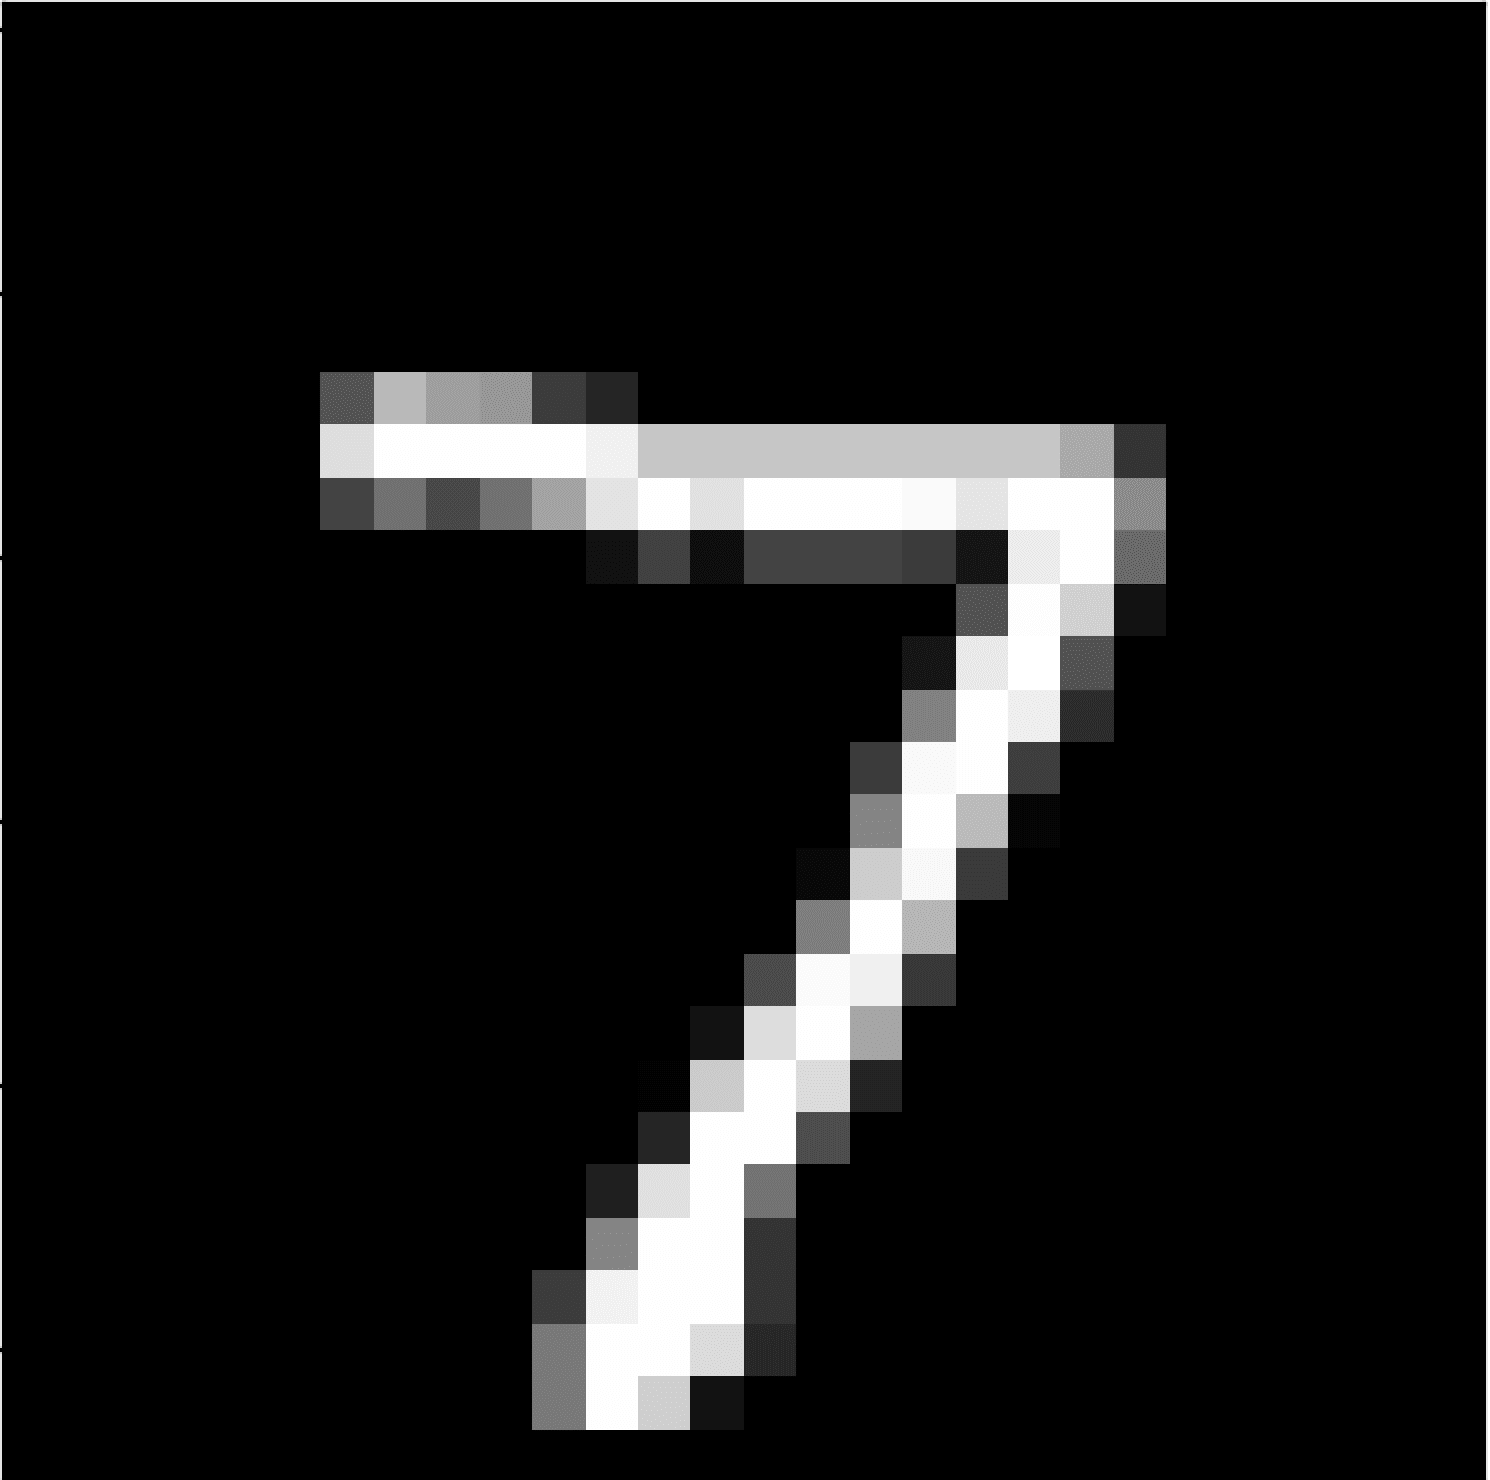

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  7


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)